# My Mr Clean

In [78]:
# ! pip install seaborn

In [79]:
import requests
import mylib as lib
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

## 1. Get content from Wikipedia

In [80]:
def get_content(title):
    url = f"https://en.wikipedia.org/w/api.php?action=query&prop=extracts&titles={title}&explaintext&format=json"  
    
    respons = requests.get(url)
    data = respons.json()
    
    return data

In [81]:
data = get_content("Ozone_layer")

In [82]:
# data

## 2. merge contents

In [83]:
def merge_contents(json_data):
    key = list(json_data['query']['pages'].keys())[0]
    data = str(json_data['query']['pages'][key]['extract'])

    data = lib.drop_ab({'{':'}', '\(' : '\)'}, data)  

    porridge = data.split("\n\n\n")
    porridge = porridge[0:-4]

    respons = ""
    
    for n in porridge:
        n = lib.drop_symbol(n)
        n = lib.drops(["=", ',', '.', ':', '"', '-', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0'], " ", n)
        respons += n
    respons = lib.drops(["\n", "\\"], " ", respons)
    return respons

In [84]:
merge_content = merge_contents(data)

In [85]:
# merge_content

## 3. Tokenize

In [86]:
def tokenize(content):
    content = lib.drops([",", "."], " ", content)
    data = content.split(" ")
    data2 = []
    for n in data:
        if len(n) != 0:
            data2.append(n)
    
    return data2

In [87]:
collection = tokenize(merge_content)

In [88]:
# collection

## 4. Lower collection

In [89]:
def lower_collection(collection):
    respons = []
    for n in collection:
        respons.append(n.lower())
    return respons    

In [90]:
lower_collection = lower_collection(collection)

In [91]:
# lower_collection

## 5. Count frequensy

In [92]:
def count_frequency(collection):
    respons = {}
    while 0 != len(collection):
        word = collection.pop(0)
        respons[word] = 1
        for n in collection:
            if n == word:
                collection.remove(n)
                respons[word] += 1
    return respons

In [93]:
frequencies = count_frequency(lower_collection[0:-1])

In [94]:
# frequencies

## 6. Visualizing

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

In [125]:
def print_most_frequent(frequencies, n):
    keys, values = [], []
    for key, value in frequencies.items():
        keys.append(key)
        values.append(value)

#     sns.set(style="darkgrid")
    df = pd.DataFrame({"words" : keys, "frequent" : values})
    df = df.sort_values(by=["frequent"], ascending=False).head(n)
    
    plt.style.use('dark_background')
    f, ax = plt.subplots(figsize=(20, 15))
    ax.grid(False)
    sns.set_color_codes("muted")
    sns.set(style="darkgrid")
    sns.barplot(x="frequent", y="words", data=df, label="Ozare Layer",  orient = "h").set(title='Most Common Tokens  In The Ozone Layers article')
    
    
    

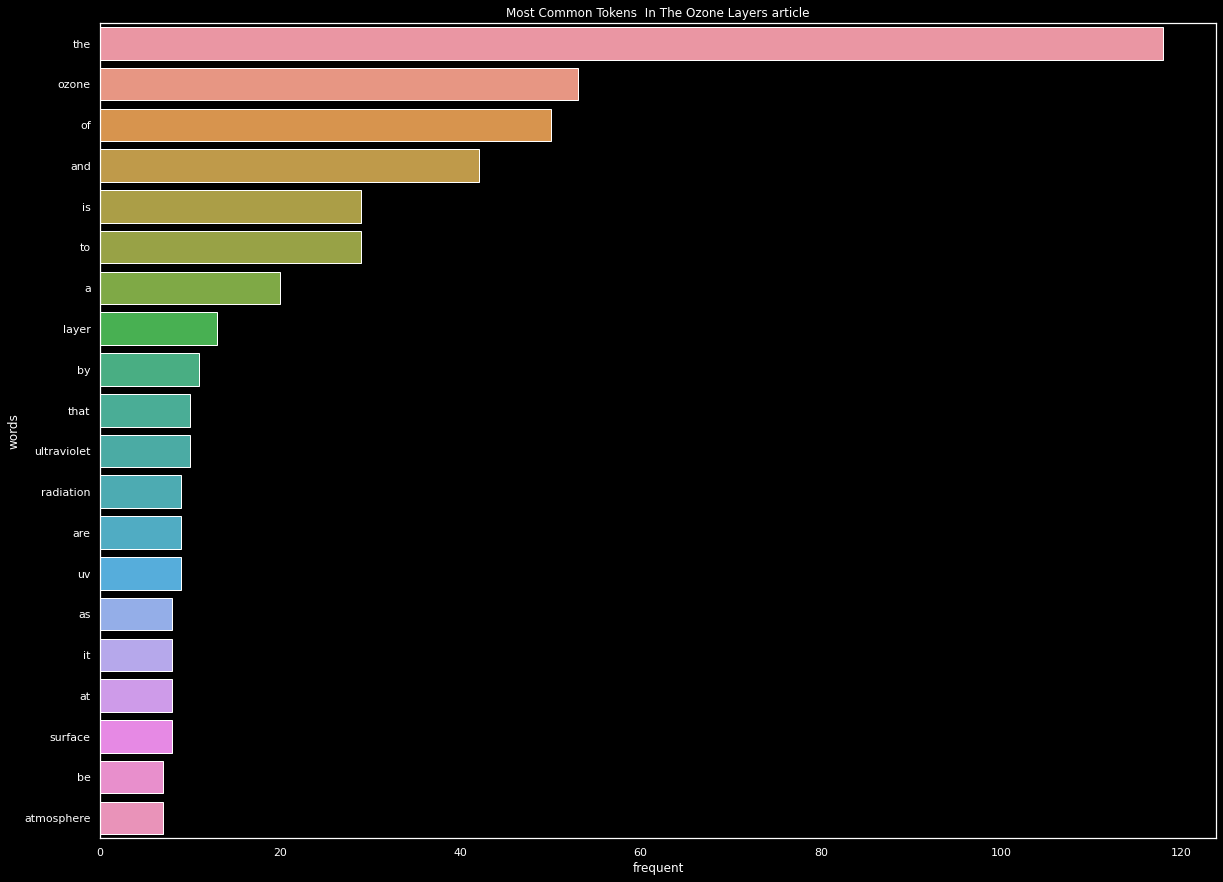

In [129]:
print_most_frequent(frequencies, 20)

## 7.Filtering

In [36]:
# frequencies

In [110]:
def remove_stop_words(words, stop_words):
    copy_words = {}
    for key, value in words.items():
        copy_words[key] = value

    keys = []
    for key, value in copy_words.items():
        for word in stop_words:
            if key == word:
                keys.append(key)

    for key in keys:
        copy_words.pop(key)
    return copy_words

In [111]:
stop_words = ["the", 'a', "of", "is", "and", "by", "to", "that", "are", "at", "on", 'an', "uv", 'for', 'be', 'it', 'as', 'this', 'about', 'from', 'these', 'has', 'do', 's', 'so', 'out', 'or', 'du']

filtered_collection = remove_stop_words(frequencies, stop_words)

In [112]:
# filtered_collection

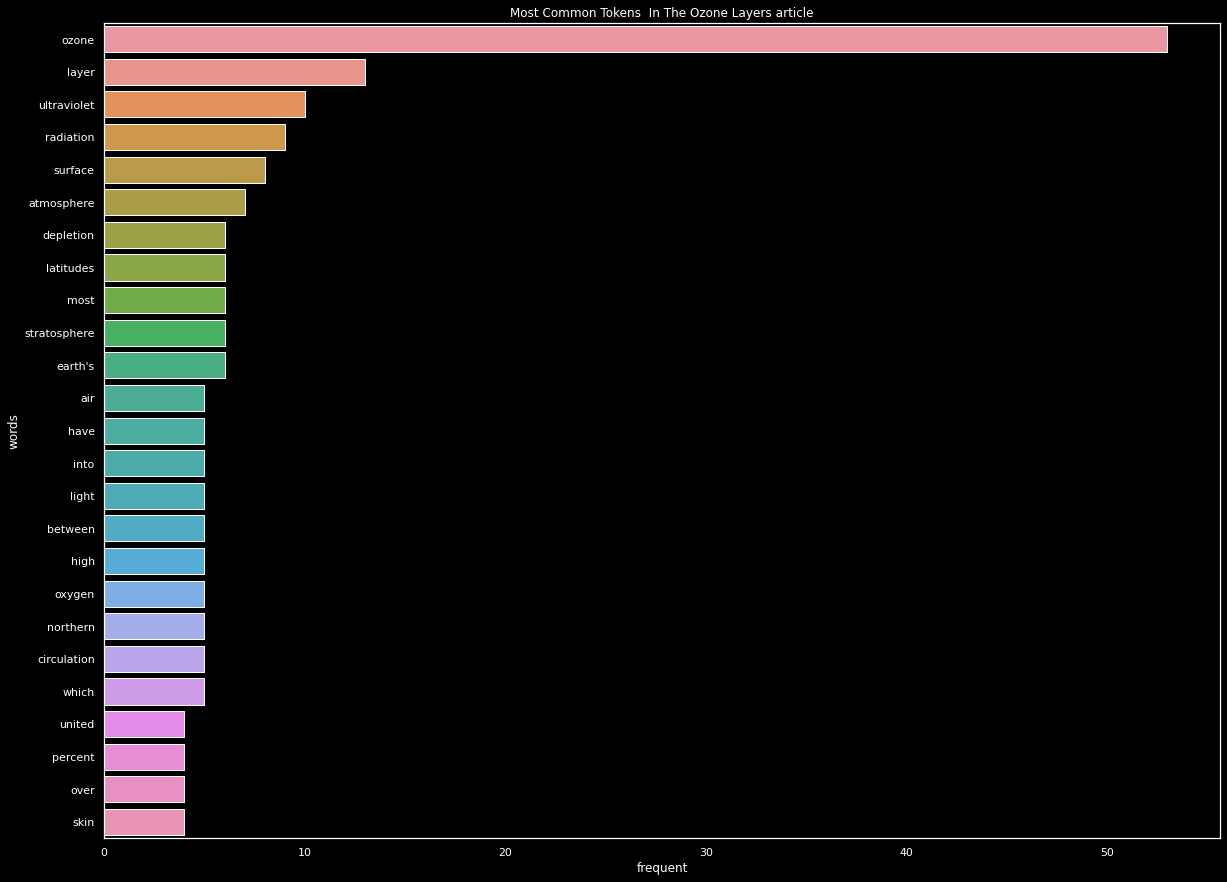

In [113]:
print_most_frequent(filtered_collection, 25)

## Testing

In [120]:
! gandalf



 ██████╗ ██╗    ██╗ █████╗ ███████╗ █████╗ ██████╗    ██╗ ██████╗ 
██╔═══██╗██║    ██║██╔══██╗██╔════╝██╔══██╗██╔══██╗   ██║██╔═══██╗
██║   ██║██║ █╗ ██║███████║███████╗███████║██████╔╝   ██║██║   ██║
██║▄▄ ██║██║███╗██║██╔══██║╚════██║██╔══██║██╔══██╗   ██║██║   ██║
╚██████╔╝╚███╔███╔╝██║  ██║███████║██║  ██║██║  ██║██╗██║╚██████╔╝
 ╚══▀▀═╝  ╚══╝╚══╝ ╚═╝  ╚═╝╚══════╝╚═╝  ╚═╝╚═╝  ╚═╝╚═╝╚═╝ ╚═════╝ 
																																 
Booting Gandalf v4.1.12-deab022 (production)
Loading parameters:  OK
User temirov_s connection: OK


<MY_MR_CLEAN>
Directory . exists: OK
Pushing exercise: OK
Printing your report:

      REPORT        MY MR CLEAN 

 Status             SUCCESS     
 Execution Runtime  4.163628    
 Score              [=====] 5/5 


Checks detail Report:

 TEST COUNT FREQUENCY  SUCCESS 



 TEST GET CONTENT  SUCCESS 



 TEST LOWER COLLECTION  SUCCESS 



 TEST MERGE CONTENTS  SUCCESS 



 TEST TOKENIZE  SUCCESS 


</MY_MR_CLEAN>
